In [163]:
set.seed(123)  # for reproducibility

In [164]:
# generate 20 samples from a normal distribution of mean 0 and variance 1
x1 <- rnorm(10, mean = 0, sd = 1)

# generate 30 samples from a normal distribution of mean 0 and variance root 3 and add to the previous samples
x2 <- rnorm(20, mean = 0, sd = sqrt(sqrt(3)))

# generate 25 samples from a normal distribution of mean 2 and variance 1 and add to the previous samples
x3 <- rnorm(45, mean = 2, sd = 1)

# generate 25 samples from a normal distribution of mean 2 and variance 2 and add to the previous samples
x4 <- rnorm(25, mean = 2, sd = sqrt(2))

# combine all samples into a single vector
mean_var_change <- matrix(c(x1, x2, x3, x4), ncol = 1)

In [165]:
library(ecp)

In [166]:
# use the e divisive method to detect change points
result <- e.divisive(X=mean_var_change, R = 999, min.size = 15)

In [167]:
# Change point locations (indices in x)
print(result$estimates)  # Includes first and last indices

[1]   1  30 101


In [168]:
summary(result)

                Length Class  Mode   
k.hat             1    -none- numeric
order.found       3    -none- numeric
estimates         3    -none- numeric
considered.last   1    -none- numeric
p.values          2    -none- numeric
permutations      2    -none- numeric
cluster         100    -none- numeric

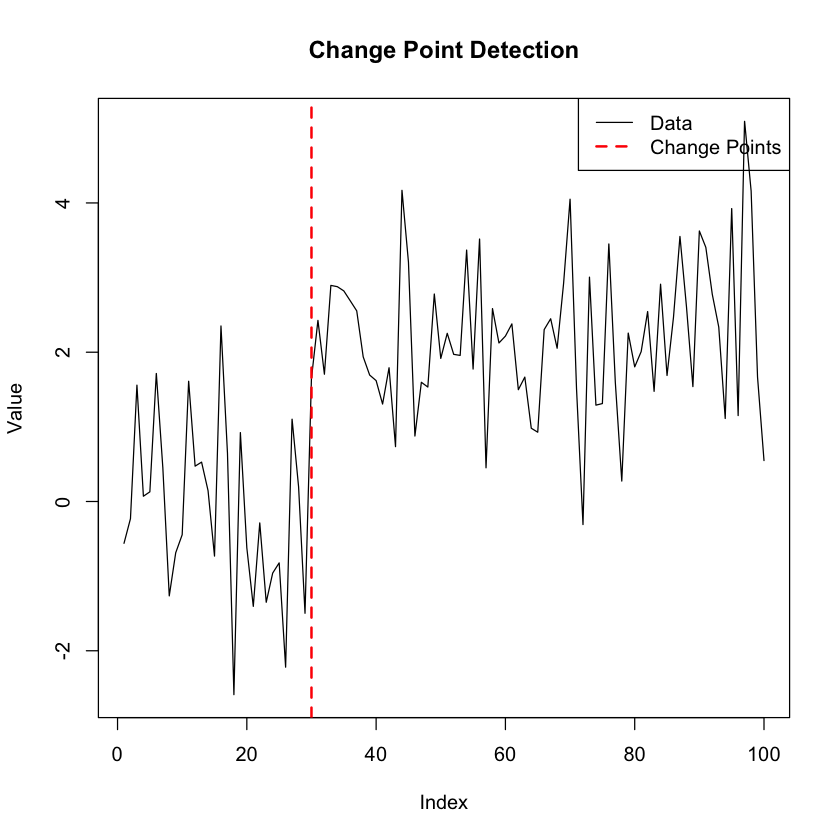

In [169]:
plot(mean_var_change, type = "l", main = "Change Point Detection", xlab = "Index", ylab = "Value")

# Add vertical lines at change point locations (excluding first and last indices)
change_points <- result$estimates[-c(1, length(result$estimates))]
abline(v = change_points, col = "red", lty = 2, lwd = 2)

# Add legend
legend("topright", legend = c("Data", "Change Points"),
       col = c("black", "red"), lty = c(1, 2), lwd = c(1, 2))

In [170]:
library(InspectChangepoint)

In [171]:
result <- inspect(mean_var_change)

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading requ

. Threshold = 3.802564 


Loading required namespace: RSpectra

Loading required namespace: RSpectra

Loading required namespace: RSpectra



In [172]:
# Change point locations (indices in x)
print(result$changepoints)  # Includes first and last indices

     location max.proj.cusum depth
[1,]       29       10.18345     1


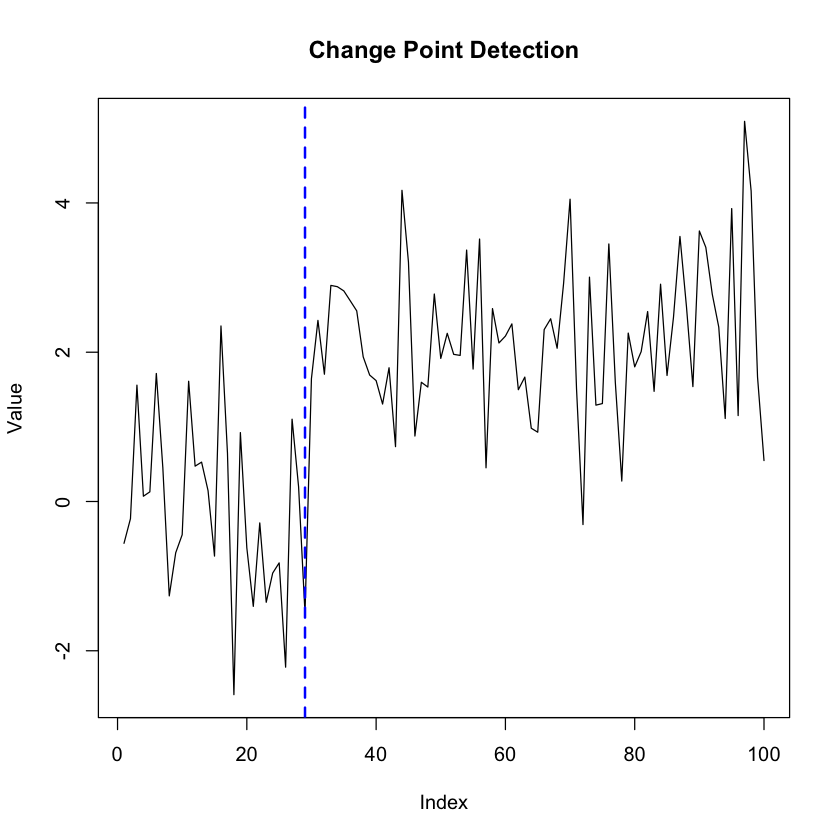

In [173]:
plot(mean_var_change, type = "l", main = "Change Point Detection", xlab = "Index", ylab = "Value")

# Add vertical lines for change points
abline(v = result$changepoints[, "location"], col = "blue", lty = 2, lwd = 2)